
Logistic Regression - Training Accuracy: 0.96
Logistic Regression - Testing Accuracy: 0.97
Logistic Regression - Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     13868
           1       0.95      0.91      0.93      4262

    accuracy                           0.97     18130
   macro avg       0.96      0.95      0.95     18130
weighted avg       0.97      0.97      0.97     18130



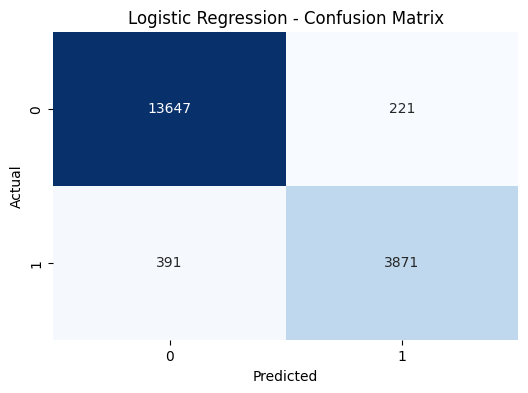


Decision Tree Classifier - Training Accuracy: 0.97
Decision Tree Classifier - Testing Accuracy: 0.97
Decision Tree Classifier - Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     13868
           1       0.94      0.94      0.94      4262

    accuracy                           0.97     18130
   macro avg       0.96      0.96      0.96     18130
weighted avg       0.97      0.97      0.97     18130



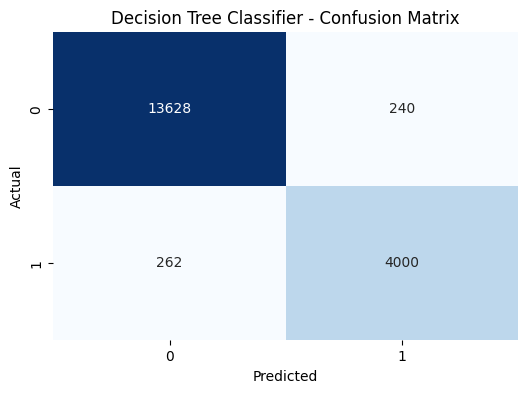

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def load_and_preprocess_data(filepath):
    """
    Load data from a CSV file, handle missing values, and apply one-hot encoding.
    """
    try:
        data = pd.read_csv(filepath)
    except FileNotFoundError:
        print(f"Error: File {filepath} not found.")
        return None

    selected_data = data[['Make', 'Model Year', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility']].copy()
    selected_data.dropna(inplace=True)
    selected_data = selected_data[selected_data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] != 'Eligibility unknown as battery range has not been researched']
    encoded_data = pd.get_dummies(selected_data, columns=['Make', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility'], drop_first=True)
    return encoded_data.astype(int)

def split_data(data):
    """
    Split the dataset into features (X) and target labels (y).
    """
    X = data.drop(['Clean Alternative Fuel Vehicle (CAFV) Eligibility_Not eligible due to low battery range'], axis=1)
    y = data['Clean Alternative Fuel Vehicle (CAFV) Eligibility_Not eligible due to low battery range']
    return X, y

def standardize_data(X):
    """
    Standardize feature data using StandardScaler.
    """
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled

def train_logistic_regression(X_train, y_train):
    """
    Train Logistic Regression model.
    """
    log_reg = LogisticRegression(max_iter=1000)
    log_reg.fit(X_train, y_train)
    return log_reg

def train_decision_tree(X_train, y_train):
    """
    Train Decision Tree Classifier model.
    """
    tree = DecisionTreeClassifier(random_state=42)
    tree.fit(X_train, y_train)
    return tree

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """
    Evaluate the model and print performance metrics.
    """
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)

    print(f"\n{model_name} - Training Accuracy: {accuracy_train:.2f}")
    print(f"{model_name} - Testing Accuracy: {accuracy_test:.2f}")

    print(f"{model_name} - Classification Report on Test Data:")
    print(classification_report(y_test, y_pred_test))

    # Confusion matrix visualization
    cm = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

def main():
    # Load and preprocess the data
    filepath = "Electric_Vehicle_Population_Data.csv"
    data = load_and_preprocess_data(filepath)
    if data is None:
        return

    # Split data into features and labels
    X, y = split_data(data)

    # Standardize feature data
    X_scaled = standardize_data(X)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Train and evaluate Logistic Regression
    log_reg = train_logistic_regression(X_train, y_train)
    evaluate_model(log_reg, X_train, X_test, y_train, y_test, "Logistic Regression")

    # Train and evaluate Decision Tree Classifier
    tree = train_decision_tree(X_train, y_train)
    evaluate_model(tree, X_train, X_test, y_train, y_test, "Decision Tree Classifier")

# Run the main program
if __name__ == "__main__":
    main()